In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [3]:
df = pd.read_csv("datasets/SampleData.csv")

In [4]:
df

,Time,Cycle,Base,Category,Duration
0,1/11/2019 20:22,1,T,Step1,5.750
1,1/11/2019 20:23,1,T,Step2,14.750
2,1/11/2019 20:23,1,T,Step3,20.781
3,1/11/2019 20:23,1,T,Step4,251.000
4,1/11/2019 20:27,1,T,Step5,7.250
5,1/11/2019 20:27,1,T,Step6,25.235
6,1/11/2019 20:28,1,T,Step7,5.875
7,1/11/2019 20:28,1,T,Step8,21.469
8,1/11/2019 20:28,1,A,Step1,5.781
9,1/11/2019 20:28,1,A,Step2,14.750


### Are there any missing values in the dataset? 

In [24]:
#There are no missing values. 
df[df.isna()].sum()

Time        0.0
Cycle       0.0
Base        0.0
Category    0.0
Duration    0.0
dtype: float64

### Do any nucelotide bases show higher time and/or variation? 

In [8]:
df.groupby('Base').Duration.agg(['mean', 'std'])

,mean,std
Base,,
A,44.141758,79.379287
C,43.957290,78.938445
G,44.111136,78.906100
T,45.328000,78.513452


(0, 80)

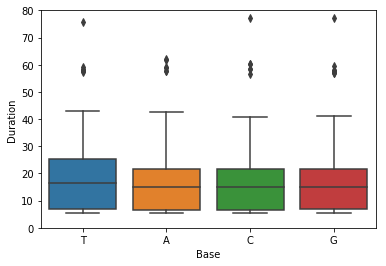

In [17]:
#Data Validiation of above output. 
sns.boxplot(x = 'Base', y = 'Duration', data = df)
plt.ylim(0, 80)

T has a slightly increased duration time and standard deviation but is quite similar to everything else. 

### What is the average cycle time? 

In [22]:
df.groupby("Cycle")['Duration'].mean().mean()

44.37832812499998

### What is the duration for each cycle? 

In [25]:
#Create a new dataframe after group by.
cycle = df.groupby("Cycle")['Duration'].agg(['mean', 'min', 'max', 'std'])
cycle = cycle.reset_index()
cycle

,Cycle,mean,min,max,std
0,1,43.019531,5.735,251.110,80.117119
1,2,44.183125,5.609,251.031,79.895869
2,3,43.528312,5.703,251.016,80.020367
3,4,47.203125,5.735,326.344,87.022403
4,5,44.230937,5.734,250.953,79.889444
5,6,44.177750,5.703,250.906,80.030752
6,7,44.806156,5.609,251.016,79.785791
7,8,43.574688,5.594,254.031,80.291396
8,9,43.546875,5.641,251.032,80.020022
9,10,44.748063,5.734,251.109,79.942204


C:\Users\bryan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


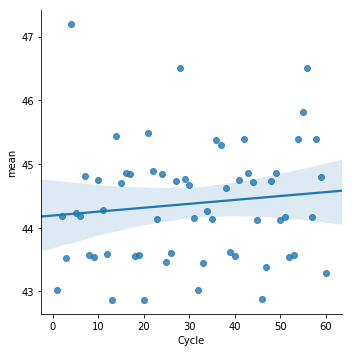

In [20]:
sns.lmplot(data = cycle, y = "mean", x = "Cycle")

There is a slight increase in average time per cycle

### What is the duration for each step for every cycle? 

In [45]:
df.groupby('Category')['Duration'].agg(['mean', 'min', 'max', 'std'])
#Steps 3 and 6 have relatively higher standard deviation. Lets make a t-stat column. 

,mean,min,max,std
Category,,,,
Step1,5.786630,5.593,7.078,0.132949
Step2,14.713870,14.468,14.922,0.089042
Step3,31.112803,17.812,77.328,13.929603
Step4,251.378727,250.859,326.344,4.904999
Step5,7.129256,6.859,7.391,0.100473
Step6,17.684063,14.938,25.344,4.355499
Step7,5.768261,5.594,6.360,0.080946
Step8,21.526311,21.047,23.000,0.180006


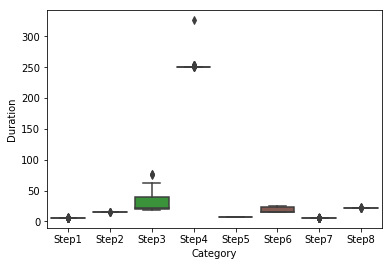

In [23]:
sns.boxplot(x = 'Category', y = 'Duration', data = df)

In [5]:
df.describe()

,Cycle,Duration
count,1904.000000,1904.000000
mean,30.252101,44.387490
std,17.181896,78.874701
min,1.000000,5.593000
25%,15.000000,6.883000
50%,30.000000,14.930000
75%,45.000000,21.578000
max,60.000000,326.344000
